#**WEBSITE TRAFFIC**
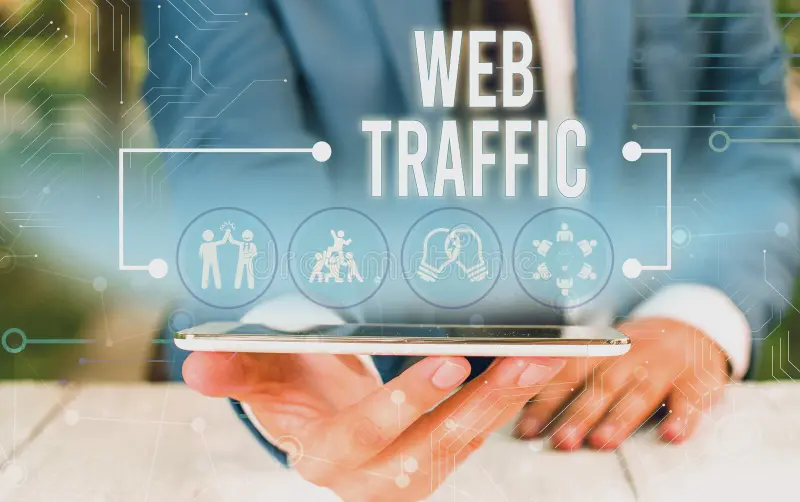[datalink](https://www.kaggle.com/datasets/anthonytherrien/website-traffic)

In [ ]:
# Load library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, confusion_matrix, accuracy_score

In [6]:
df = pd.read_csv('/content/Website_traffic_Dataset.csv')
df.head()

,Page Views,Session Duration,Bounce Rate,Traffic Source,Time on Page,Previous Visits,Conversion Rate
0,5,11.051381,0.230652,Organic,3.890460,3,1.0
1,4,3.429316,0.391001,Social,8.478174,0,1.0
2,4,1.621052,0.397986,Organic,9.636170,2,1.0
3,5,3.629279,0.180458,Organic,2.071925,3,1.0
4,5,4.235843,0.291541,Paid,1.960654,5,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Page Views        2000 non-null   int64  
 1   Session Duration  2000 non-null   float64
 2   Bounce Rate       2000 non-null   float64
 3   Traffic Source    2000 non-null   object 
 4   Time on Page      2000 non-null   float64
 5   Previous Visits   2000 non-null   int64  
 6   Conversion Rate   2000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 109.5+ KB


In [ ]:
# data cleaning
df.isnull().sum()

,0
Page Views,0
Session Duration,0
Bounce Rate,0
Traffic Source,0
Time on Page,0
Previous Visits,0
Conversion Rate,0


In [ ]:
# catagorical data
df.nunique()

,0
Page Views,15
Session Duration,2000
Bounce Rate,2000
Traffic Source,5
Time on Page,2000
Previous Visits,10
Conversion Rate,228


In [ ]:
# drop highly changing data
df.drop(['Session Duration', 'Bounce Rate', 'Time on Page'], axis=1, inplace=True)
df.head()

,Page Views,Traffic Source,Previous Visits,Conversion Rate
0,5,Organic,3,1.0
1,4,Social,0,1.0
2,4,Organic,2,1.0
3,5,Organic,3,1.0
4,5,Paid,5,1.0


Page Views
count    2000.000000
mean        4.950500
std         2.183903
min         0.000000
25%         3.000000
50%         5.000000
75%         6.000000
max        14.000000
Name: Page Views, dtype: float64


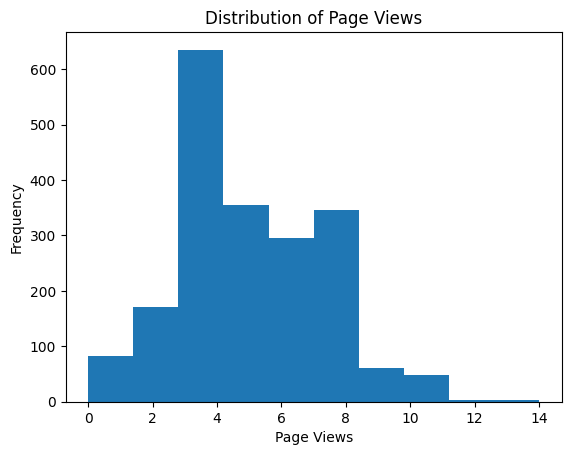

Session Duration
count    2000.000000
mean        3.022045
std         3.104518
min         0.003613
25%         0.815828
50%         1.993983
75%         4.197569
max        20.290516
Name: Session Duration, dtype: float64


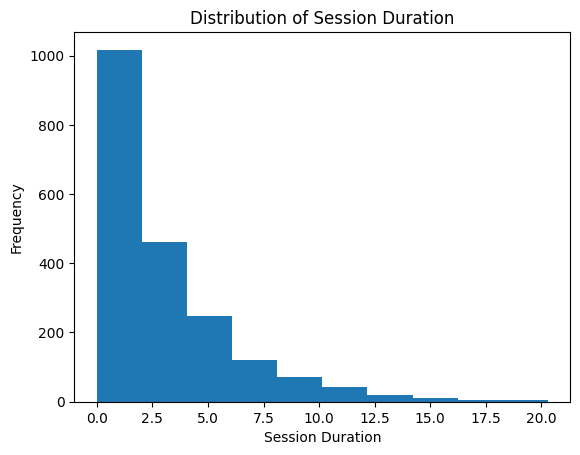

Bounce Rate
count    2000.000000
mean        0.284767
std         0.159781
min         0.007868
25%         0.161986
50%         0.266375
75%         0.388551
max         0.844939
Name: Bounce Rate, dtype: float64


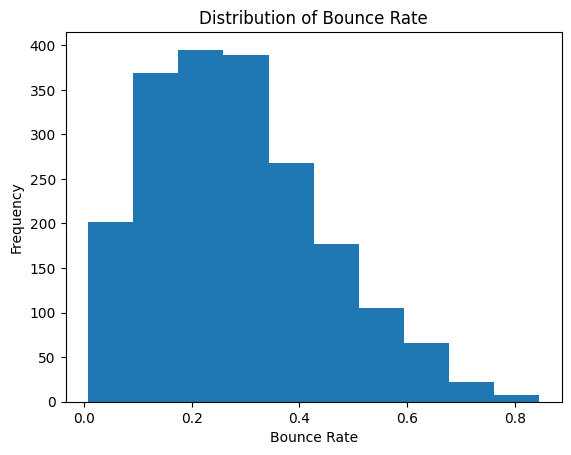

Traffic Source
Traffic Source
Organic     786
Paid        428
Referral    301
Social      269
Direct      216
Name: count, dtype: int64
Time on Page
count    2000.000000
mean        4.027439
std         2.887422
min         0.068515
25%         1.935037
50%         3.315316
75%         5.414627
max        24.796182
Name: Time on Page, dtype: float64


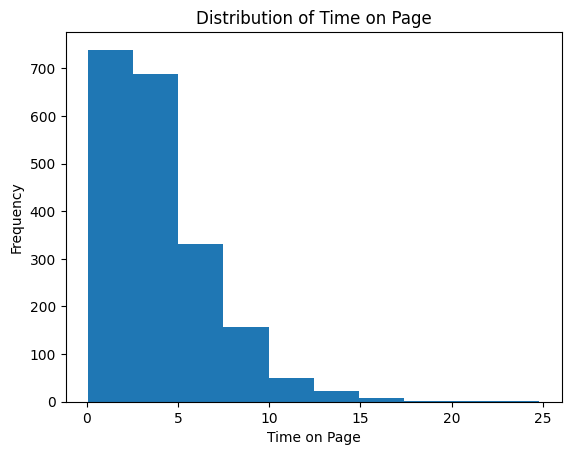

Previous Visits
count    2000.000000
mean        1.978500
std         1.432852
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         9.000000
Name: Previous Visits, dtype: float64


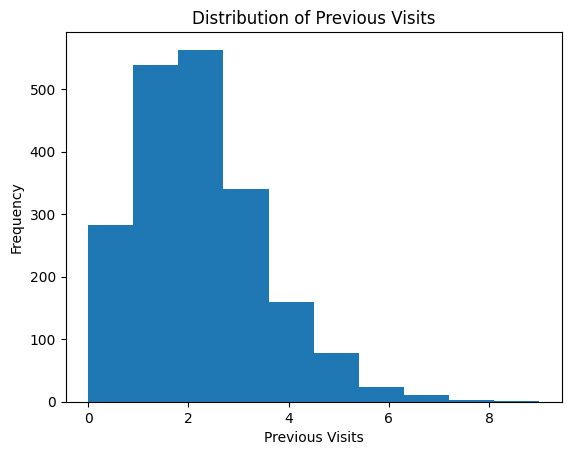

Conversion Rate
count    2000.000000
mean        0.982065
std         0.065680
min         0.343665
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Conversion Rate, dtype: float64


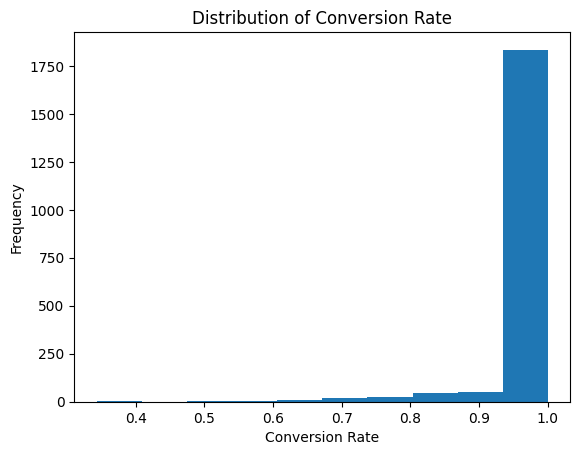

In [7]:
# EDA
for i in df.columns:
  print(i)
  if df[i].dtype == 'object':
    print(df[i].value_counts())
    plt.show()
  else:
    plt.hist(df[i])
    print(df[i].describe())
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {i}')
    plt.show()


In [ ]:
# split the data
X = df.drop('Traffic Source', axis=1)
y = df['Traffic Source']

In [ ]:
# label Encoder for X
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X = X.apply(le.fit_transform)
X.head()



,Page Views,Previous Visits,Conversion Rate
0,5,3,227
1,4,0,227
2,4,2,227
3,5,3,227
4,5,5,227


In [ ]:
X.nunique()

,0
Page Views,15
Previous Visits,10
Conversion Rate,228


In [ ]:
# Training the algorithm
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Shape
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1600, 3) (400, 3) (1600,) (400,)


In [ ]:
# fit the algorithm
from sklearn.tree import DecisionTreeClassifier # Import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# prediction
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Direct       0.12      0.05      0.07        40
     Organic       0.39      0.81      0.53       156
        Paid       0.14      0.06      0.08        83
    Referral       0.11      0.03      0.05        68
      Social       0.17      0.02      0.03        53

    accuracy                           0.34       400
   macro avg       0.19      0.19      0.15       400
weighted avg       0.24      0.34      0.24       400



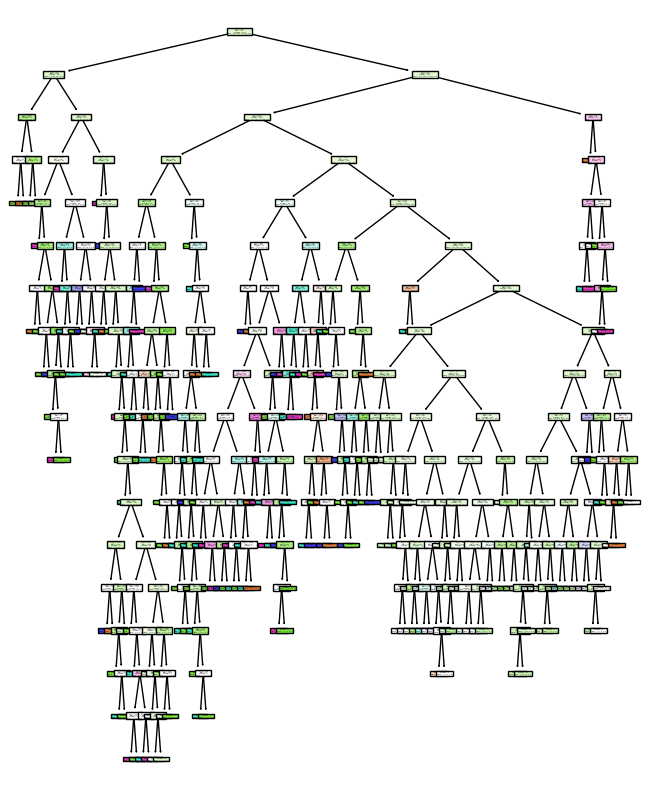

In [ ]:
# Visualization
from sklearn.tree import plot_tree # Import plot_tree from sklearn.tree
import matplotlib.pyplot as plt
plt.figure(figsize=(8,10))
plot_tree(dt, filled=True)
plt.show()

In [ ]:
# fit the algorithm
dt2 = DecisionTreeClassifier(criterion = 'gini', max_depth=3)
dt2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
y_pred2 = dt2.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

      Direct       0.50      0.03      0.05        40
     Organic       0.39      0.99      0.56       156
        Paid       0.00      0.00      0.00        83
    Referral       0.00      0.00      0.00        68
      Social       0.00      0.00      0.00        53

    accuracy                           0.39       400
   macro avg       0.18      0.20      0.12       400
weighted avg       0.20      0.39      0.22       400



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


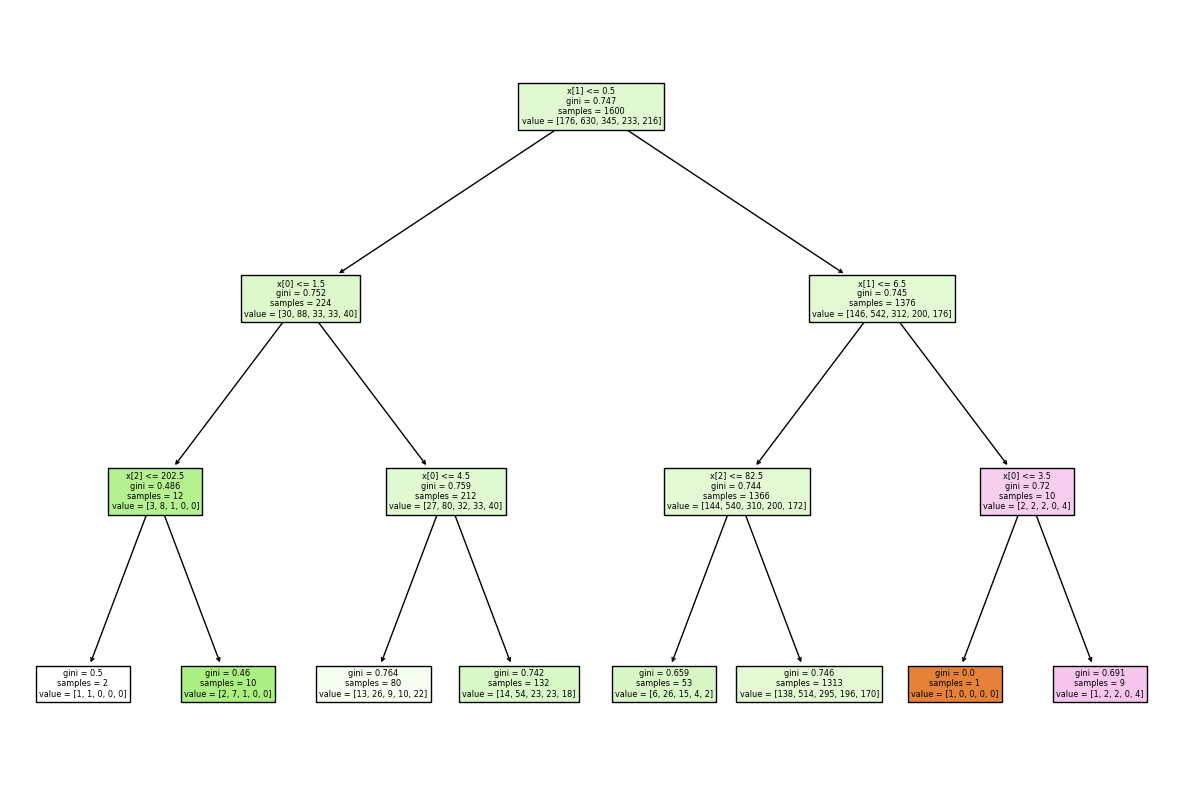

In [ ]:
# visualize
plt.figure(figsize=(15,10))
plot_tree(dt2, filled=True)
plt.show()

In [ ]:
# fit the algorithm
dt3 = DecisionTreeClassifier(criterion = 'entropy', max_depth=3)
dt3.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

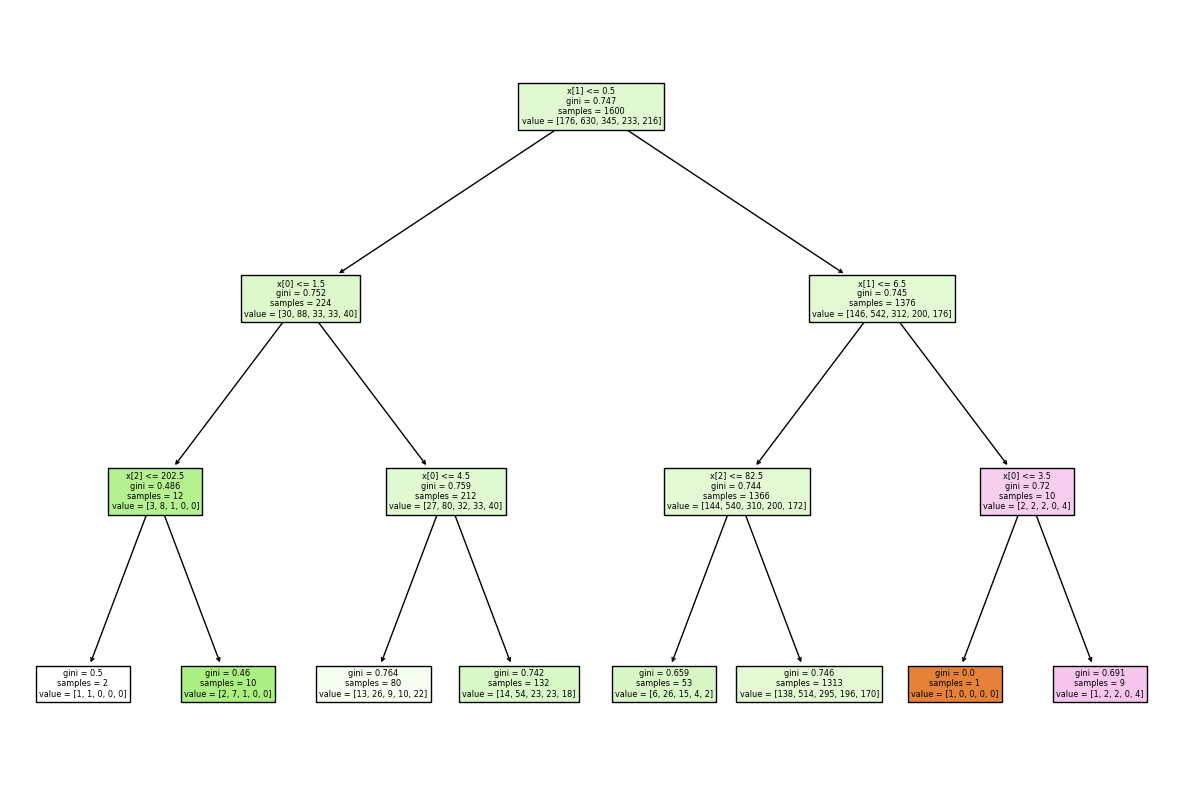

In [ ]:
# Visualze
plt.figure(figsize=(15,10))
plot_tree(dt2,filled=True)
plt.show()

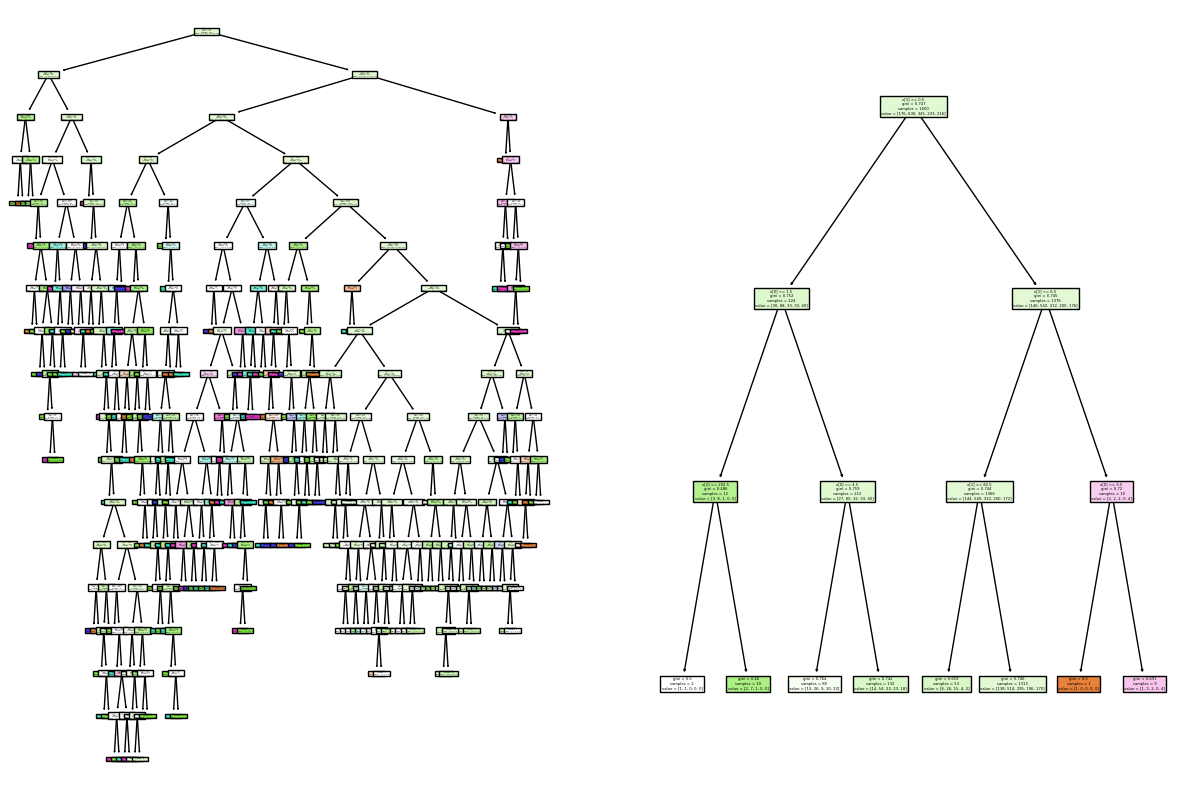

In [ ]:
# Visualize the tree
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plot_tree(dt,filled=True)

plt.subplot(1,2,2)
plot_tree(dt2,filled=True)
plt.show()